In [7]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [6.0*.65, 4.0*.65]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.labelpad'] = 5
plt.rcParams['lines.linewidth'] = 1.4*0.65


In [2]:
%%html

<style>
.jp-OutputArea-child:has(> .jp-RenderedImage) {
    display: inline-block;
}
</style>

<style>
.jp-OutputArea-child {
    display: inline-block;
}
</style>

0.810012095943


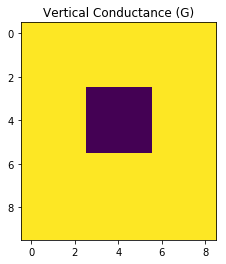

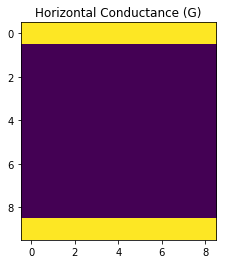

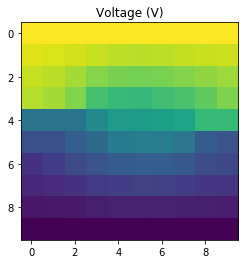

In [255]:
N = 10

vGs = np.ones((N, N-1))
hGs = np.ones((N, N-1))
hGs[0,:] = 1e9
hGs[-1,:] = 1e9

vGs[3:6,3:6] = 0
hGs[3:6,3:6] = 0

Gs = np.concatenate((vGs, hGs))
D1 = np.eye(N-1, N) - np.eye(N-1, N, 1)
D = np.concatenate((np.kron(D1, np.eye(N)), np.kron(np.eye(N), D1)))
i, j = N*1 + 1, N*7 + 6
i, j = 0, N*N-1
b = np.zeros(N**2)
b[i], b[j] = 1, -1
v = np.linalg.solve(D.conj().T.dot(np.diag(Gs.flatten())).dot(D), b)
vs = v.reshape((N,N))

print(1/(v[i] - v[j]))

plt.imshow(vGs)
plt.title('Vertical Conductance (G)')
plt.show()
plt.imshow(hGs)
plt.title('Horizontal Conductance (G)')
plt.show()
plt.imshow(vs)
plt.title('Voltage (V)')
plt.show()

In [ ]:
# 3-6 (4-5, 5-6 in group), 24-25, (19-20, 31-32 Jay might save)

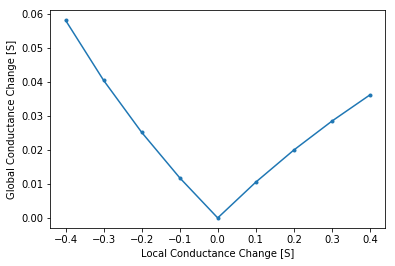

In [54]:
Rs = np.array([0.949625140109,0.933973431596, 0.920844846849, 0.909657599715, 0.900000334319, 0.891571746879, 0.884138526248, 0.877553761371,0.871657072955])
Gs = 1/Rs
Gs = Gs - Gs[4]
Gs = np.abs(Gs)

Gmods = np.array([.6,.7,.8,.9,1,1.1,1.2,1.3,1.4])

plt.plot(Gmods-1, Gs, '.-')
plt.xlabel('Local Conductance Change [S]')
plt.ylabel('Global Conductance Change [S]')
plt.show()

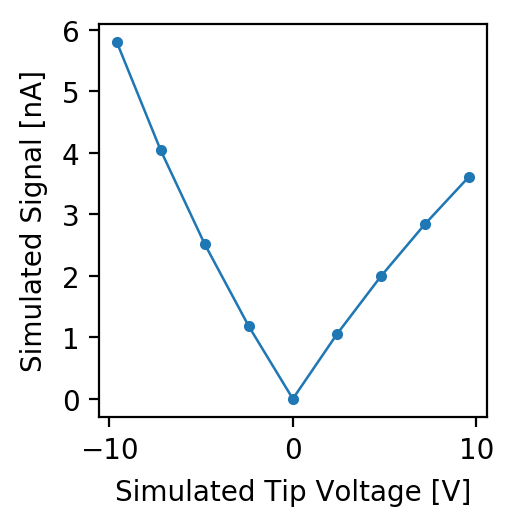

In [8]:
Rs = np.array([0.949625140109,0.933973431596, 0.920844846849, 0.909657599715, 0.900000334319, 0.891571746879, 0.884138526248, 0.877553761371,0.871657072955])
Gs = 1/Rs
Gs = Gs - Gs[4]
Gs = np.abs(Gs)

Gmods = np.array([.6,.7,.8,.9,1,1.1,1.2,1.3,1.4])

fig = plt.figure()
fig.set_figwidth(2.5)
plt.plot((Gmods-1)*24, Gs*100, '.-')
plt.xlabel('Simulated Tip Voltage [V]')
plt.ylabel('Simulated Signal [nA]')
plt.show()

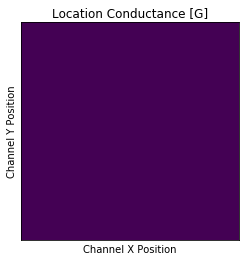

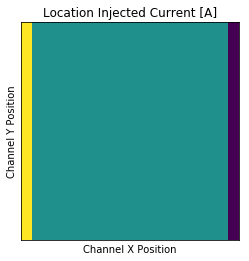

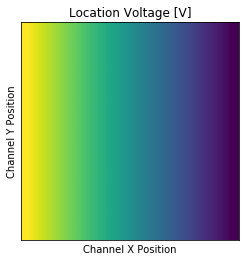

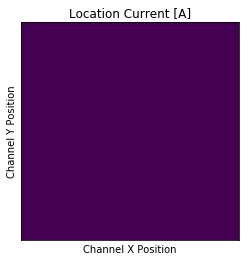

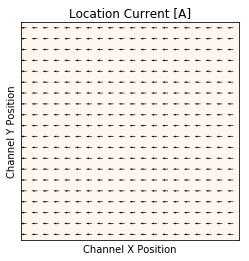

In [3]:
def getNetworkGandVs(Gs, injectIs=None):
    # Inject 1 A of current
    # Determine resistance through voltage difference V = (1 A)R
    # Return conductance (1/R), and also the voltage matrix
    
    N = max(Gs.shape)
    
    i, j = 0, N*N-1
    
    if injectIs is None:
        injectIs = np.zeros(Gs.shape)
        injectIs[0,0] = 1
        injectIs[-1,-1] = -1
    
    injectIs = 2*injectIs/(np.sum(np.abs(injectIs)))
    
    vGs = Gs[:-1, :]
    hGs = Gs[:, :-1]
    
    GsFlat = np.concatenate((vGs.flatten(), hGs.flatten()))
    D1 = np.eye(N-1, N) - np.eye(N-1, N, 1)
    
    # D is the incidence matrix of the resistor network
    D = np.concatenate((np.kron(D1, np.eye(N)), np.kron(np.eye(N), D1)))
    V = np.linalg.solve(D.conj().T.dot(np.diag(GsFlat.flatten())).dot(D), injectIs.flatten())
    Vs = V.reshape((N,N))
    
    vIs = np.diff(Vs, axis=0)*vGs
    hIs = np.diff(Vs, axis=1)*hGs
    
    vIs = np.concatenate((vIs, [vIs[-1,:]]), axis=0)
    hIs = np.concatenate((hIs, np.array([hIs[:,-1]]).T), axis=1)
    Is = np.sqrt(vIs**2 + hIs**2)
    
    # Correct numerical precision error when all currents are nearly identical
    if (np.max(Is) - np.min(Is)) < 1e-12*np.median(Is):
        Is = np.ones(Is.shape)*np.median(Is)
    
    R = V[i] - V[j]
    G = 1/R
    
    return locals()

def getGsFromVGSs(VGSs):
    pass

def plotGNetAnalysis(gnet):
    plt.imshow(np.log(gnet['Gs']), origin='lower')
    plt.title('Location Conductance [G]')
    plt.xlabel('Channel X Position')
    plt.ylabel('Channel Y Position')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    plt.imshow(gnet['injectIs'], origin='lower')
    plt.title('Location Injected Current [A]')
    plt.xlabel('Channel X Position')
    plt.ylabel('Channel Y Position')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    plt.imshow(gnet['Vs'], origin='lower', interpolation='spline36')
    plt.title('Location Voltage [V]')
    plt.xlabel('Channel X Position')
    plt.ylabel('Channel Y Position')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    plt.imshow(gnet['Is'], origin='lower', interpolation='spline36')
    plt.title('Location Current [A]')
    plt.xlabel('Channel X Position')
    plt.ylabel('Channel Y Position')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # xs = np.linspace(0,1,hIs.shape[1])
    # ys = np.linspace(1,0,hIs.shape[0])
    
    # plt.quiver(xs, ys, -hIs, vIs, angles='xy')
    # plt.imshow(gnet['Is'], extent=(np.min(xs), np.max(xs), np.min(ys), np.max(ys)), alpha=0.8, cmap='Oranges', origin='lower', interpolation='spline36')
    
    U = gnet['hIs']
    V = gnet['vIs']
    Is = gnet['Is']
    
#     if (np.max(Is) - np.min(Is)) < 0.5*np.median(Is):
#         indexOfMax = np.unravel_index(np.argmin(gnet['Is']), gnet['Is'].shape)
#         U -= U[indexOfMax]
#         V -= V[indexOfMax]
    
    plt.quiver(U, V, angles='xy')
    plt.imshow(gnet['Is'], alpha=0.8, cmap='Oranges', origin='lower', interpolation='spline36')
    plt.xticks([])
    plt.yticks([])
    plt.title('Location Current [A]')
    plt.xlabel('Channel X Position')
    plt.ylabel('Channel Y Position')
    plt.show()

N = 20
Gs = np.ones((N, N))
injectIs = np.zeros((N,N))

# Gs[:,0] = 1e6
# Gs[:,-1] = 1e6

injectIs[:,0] = 1
injectIs[:,-1] = -1

gnet = getNetworkGandVs(Gs, injectIs=injectIs)
plotGNetAnalysis(gnet)

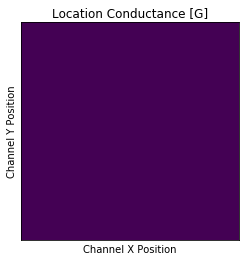

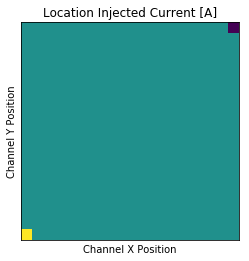

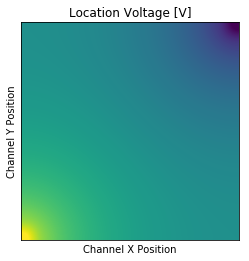

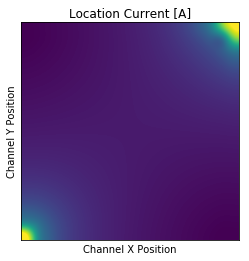

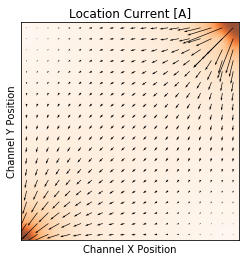

In [299]:
N = 20
Gs = np.ones((N, N))

# Horizontal Wall
# Gs[5,0:-1] = 0

# Vertical Wall
# Gs[0:-1,5] = 0

gnet = getNetworkGandVs(Gs)
plotGNetAnalysis(gnet)

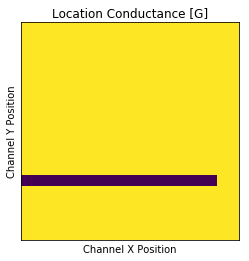

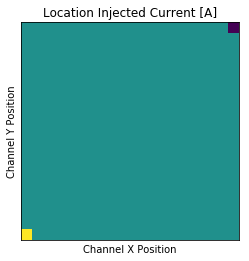

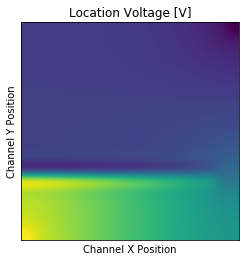

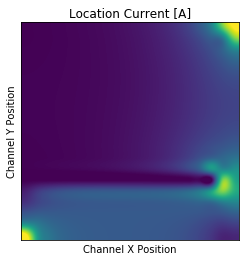

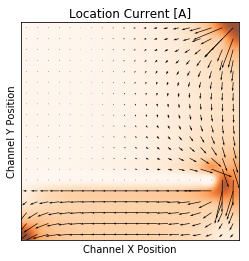

In [300]:
N = 20
Gs = np.ones((N, N))

# Horizontal Wall
Gs[5,0:-2] = 1e-6
# Vertical Wall
# Gs[0:-1,5] = 1e-6

gnet = getNetworkGandVs(Gs)
plotGNetAnalysis(gnet)


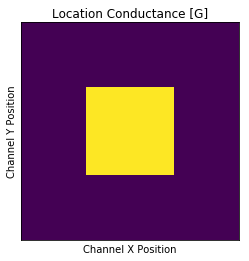

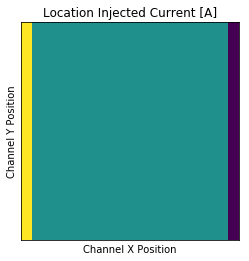

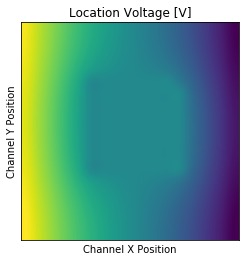

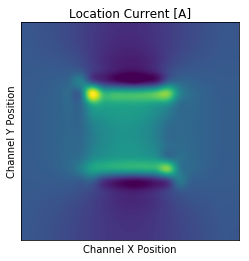

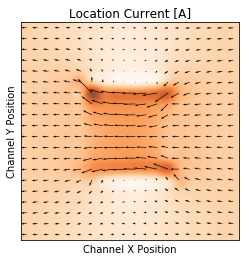

In [301]:
N = 20
Gs = np.ones((N, N))
Gs[6:14,6:14] = 1e6

injectIs = np.zeros((N,N))
injectIs[:,0] = 1
injectIs[:,-1] = -1

gnet = getNetworkGandVs(Gs, injectIs=injectIs)
plotGNetAnalysis(gnet)

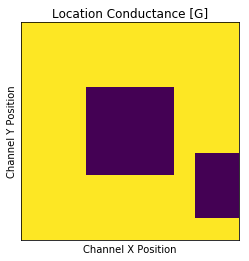

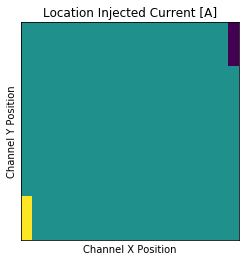

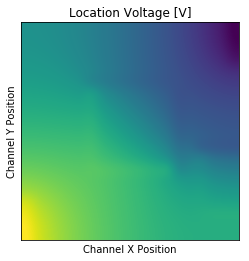

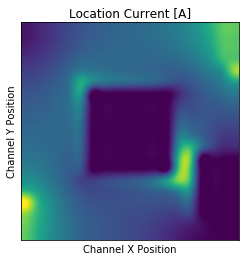

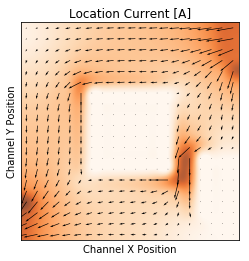

In [302]:
N = 20
Gs = np.ones((N, N))
Gs[6:14,6:14] = 1e-6
Gs[2:8,16:] = 1e-6

injectIs = np.zeros((N,N))
injectIs[0:4,0] = 1
injectIs[-4:,-1] = -1

gnet = getNetworkGandVs(Gs, injectIs=injectIs)
plotGNetAnalysis(gnet)

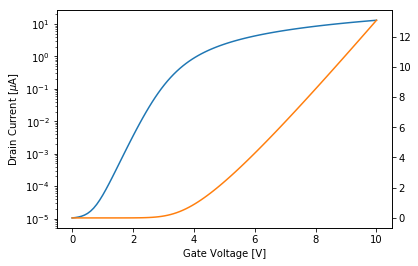

In [4]:
from scipy.special import lambertw

def stevenSimpleFET1(VGS = np.linspace(0,10,100),
                        VDS = 0.5,
                        Ioff = 1e-11,
                        Vt = 3,
                        SS = 0.5,
                        T = 273.15 + 21,
                        muCoxWoL = 5e-6,
                        n = None,
                        gm_max = None
                    ):
    kB = 8.617e-5
    q = 1
    Vtherm = kB*T/q
    
    if n is None:
        n = SS/(np.log(10)*Vtherm)
    if gm_max is not None:
        muCoxWoL = gm_max/VDS
    
    qis = lambertw(np.exp((VGS-Vt-0*VDS)/(2*n*Vtherm))).real
    qid = lambertw(np.exp((VGS-Vt-1*VDS)/(2*n*Vtherm))).real
    Id = muCoxWoL/2*(2*n*Vtherm)**2*(qis**2-qid**2)+Ioff
    
    Rds = VDS/Id
    Gds = Id/VDS
    
    return locals()

fet = stevenSimpleFET1()
plt.semilogy(fet['VGS'], fet['Id']*1e6)
plt.xlabel('Gate Voltage [V]')
plt.ylabel('Drain Current [$\mu$A]')
plt.twinx()
plt.plot([])
plt.plot(fet['VGS'], fet['Id']*1e6)
plt.show()

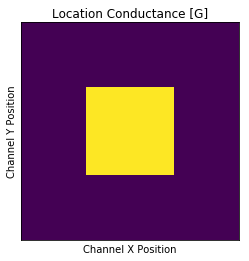

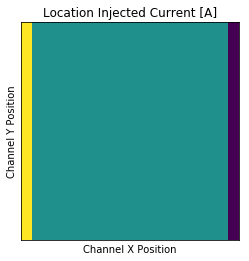

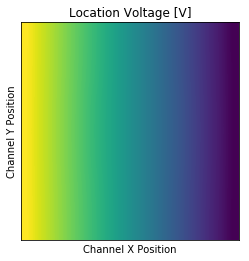

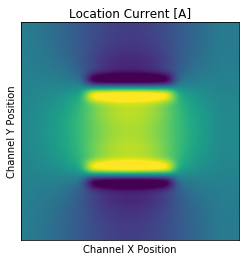

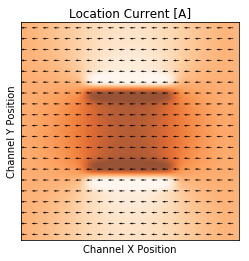

In [390]:
VGS = 5
dVGS = 0.1
baseConductivity = stevenSimpleFET1(VGS=VGS)['Gds']
alteredConductivity = stevenSimpleFET1(VGS=VGS + dVGS)['Gds']

N = 20
Gs = np.ones((N, N))*baseConductivity
Gs[6:-6,6:-6] = alteredConductivity

injectIs = np.zeros((N,N))
injectIs[:,0] = 1
injectIs[:,-1] = -1

gnet = getNetworkGandVs(Gs, injectIs=injectIs)
plotGNetAnalysis(gnet)


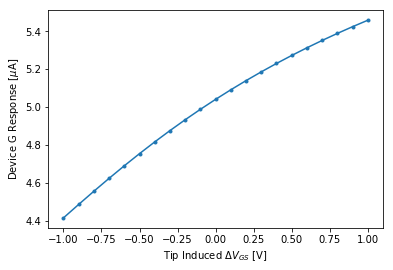

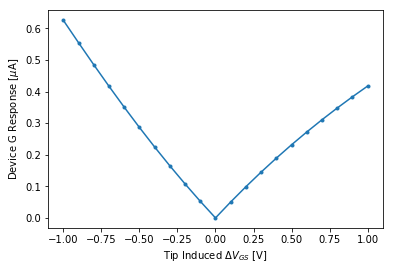

In [431]:
gnets = []
dVGSs = np.linspace(-1,1,21)

for dVGS in dVGSs:
    VGS = 5
    baseConductivity = stevenSimpleFET1(VGS=VGS)['Gds']
    alteredConductivity = stevenSimpleFET1(VGS=VGS + dVGS)['Gds']

    N = 20
    Gs = np.ones((N, N))*baseConductivity
    Gs[6:14,6:14] = alteredConductivity

    injectIs = np.zeros((N,N))
    injectIs[:,0] = 1
    injectIs[:,-1] = -1

    gnet = getNetworkGandVs(Gs, injectIs=injectIs)
    gnets.append(gnet)

responses = [gnet['G'] for gnet in gnets]

plt.plot(dVGSs, 1e6*np.array(responses), '.-')
plt.xlabel('Tip Induced $\Delta V_{GS}$ [V]')
plt.ylabel('Device G Response [$\mu$A]')
plt.show()

plt.plot(dVGSs, 1e6*np.abs(responses - responses[len(responses)//2]), '.-')
plt.xlabel('Tip Induced $\Delta V_{GS}$ [V]')
plt.ylabel('Device G Response [$\mu$A]')
plt.show()


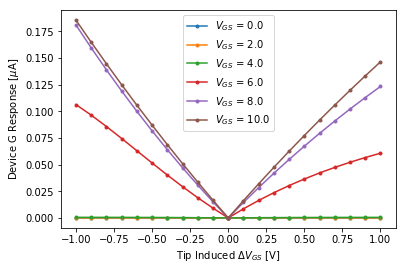

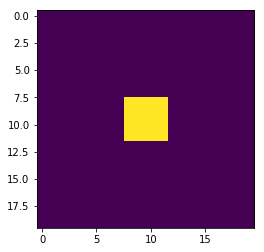

In [391]:
gnetss = []
responsess = []
VGSs = np.linspace(0,10,6)

for VGS in VGSs:
    gnets = []
    dVGSs = np.linspace(-1,1,21)
    
    for dVGS in dVGSs:
        baseConductivity = stevenSimpleFET1(VGS=VGS, Vt=5)['Gds']
        alteredConductivity = stevenSimpleFET1(VGS=VGS + dVGS, Vt=5)['Gds']
        
        N = 20
        Gs = np.ones((N, N))*baseConductivity
        Gs[8:-8,8:-8] = alteredConductivity
        
        injectIs = np.zeros((N,N))
        injectIs[:,0] = 1
        injectIs[:,-1] = -1

        gnet = getNetworkGandVs(Gs, injectIs=injectIs)
        gnets.append(gnet)
    
    responses = [gnet['G'] for gnet in gnets]
    gnetss.append(gnets)
    responsess.append(responses)
    
    plt.plot(dVGSs, 1e6*np.abs(responses - responses[len(responses)//2]), '.-', label='$V_{{GS}}$ = {}'.format(VGS))
    
plt.legend()
plt.xlabel('Tip Induced $\Delta V_{GS}$ [V]')
plt.ylabel('Device G Response [$\mu$A]')
plt.show()

plt.imshow(Gs)
plt.show()

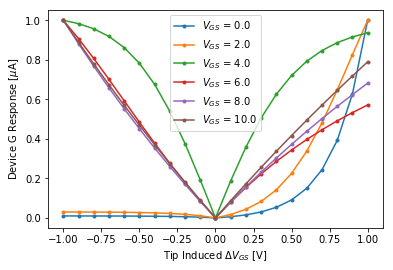

In [392]:
for responses, VGS in zip(responsess, VGSs):
    res = 1e6*np.abs(responses - responses[len(responses)//2])
    plt.plot(dVGSs, res/np.max(res), '.-', label='$V_{{GS}}$ = {}'.format(VGS))

plt.legend()
plt.xlabel('Tip Induced $\Delta V_{GS}$ [V]')
plt.ylabel('Device G Response [$\mu$A]')
plt.show()

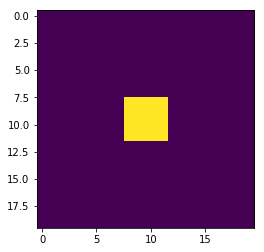

In [413]:
gnetss = []
responsess = []
VGSs = np.linspace(0,10,99)
Vt = 5

for VGS in VGSs:
    gnets = []
    dVGSs = np.linspace(-1,1,5)
    
    for dVGS in dVGSs:
        try:
            baseConductivity = stevenSimpleFET1(VGS=VGS, Vt=Vt)['Gds']
            alteredConductivity = stevenSimpleFET1(VGS=VGS + dVGS, Vt=Vt)['Gds']

            N = 20
            Gs = np.ones((N, N))*baseConductivity
            Gs[8:-8,8:-8] = alteredConductivity

            injectIs = np.zeros((N,N))
            injectIs[:,0] = 1
            injectIs[:,-1] = -1

            gnet = getNetworkGandVs(Gs, injectIs=injectIs)
            gnets.append(gnet)
        except Exception as e:
            print(e, VGS, dVGS)
    
    responses = [gnet['G'] for gnet in gnets]
    gnetss.append(gnets)
    responsess.append(responses)

plt.imshow(Gs)
plt.show()

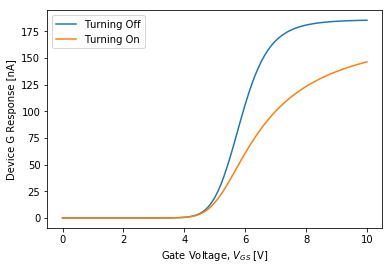

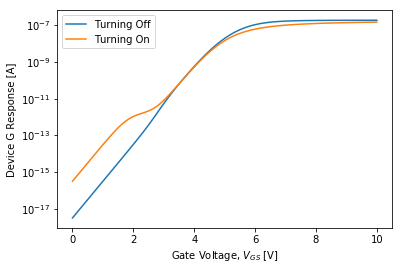

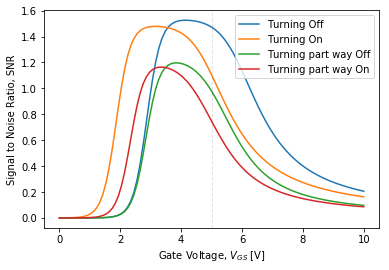

In [415]:
plt.plot(VGSs, 1e9*np.abs(np.array(responsess)[:,0] - np.array(responsess)[:,2]), label='Turning Off')
plt.plot(VGSs, 1e9*np.abs(np.array(responsess)[:,-1] - np.array(responsess)[:,2]), label='Turning On')

plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.ylabel('Device G Response [nA]')
plt.legend()
plt.show()


plt.semilogy(VGSs, np.abs(np.array(responsess)[:,0] - np.array(responsess)[:,2]), label='Turning Off')
plt.semilogy(VGSs, np.abs(np.array(responsess)[:,-1] - np.array(responsess)[:,2]), label='Turning On')

plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.ylabel('Device G Response [A]')
plt.legend()
plt.show()


plt.plot(VGSs, 1/0.05*np.abs(np.array(responsess)[:,0] - np.array(responsess)[:,2])/np.array(responsess)[:,2], label='Turning Off')
plt.plot(VGSs, 1/0.05*np.abs(np.array(responsess)[:,-1] - np.array(responsess)[:,2])/np.array(responsess)[:,2], label='Turning On')
plt.plot(VGSs, 1/0.05*np.abs(np.array(responsess)[:,1] - np.array(responsess)[:,2])/np.array(responsess)[:,2], label='Turning part way Off')
plt.plot(VGSs, 1/0.05*np.abs(np.array(responsess)[:,-2] - np.array(responsess)[:,2])/np.array(responsess)[:,2], label='Turning part way On')
plt.axvline(x=Vt, ls='--', lw=1, c='k', alpha=0.1)

plt.legend()
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.ylabel('Signal to Noise Ratio, SNR')
plt.show()

## Notes

If tip influence spans the entire channel length, then turning on and turning off are equally effective.  If tip influence only spans part of the channel length, then turning off is more effective.

## Series Capacitance Model for Tip Gating

$$ Q_{Tip} = Q_{BG} $$

$$ V_{Chan} = \frac{ C_{Tip} V_{Tip} + C_{BG} V_{BG} }{ C_{Tip} + C_{BG} } $$

$$ C = \frac{ \kappa \epsilon_0 A }{ d } $$

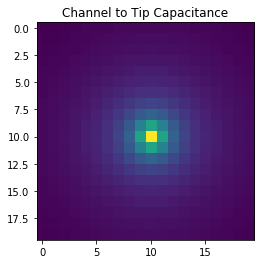

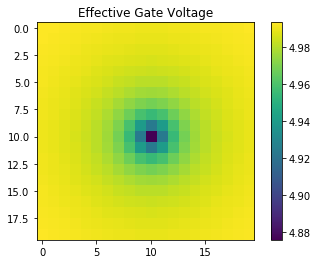

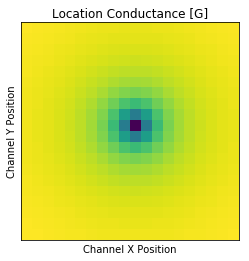

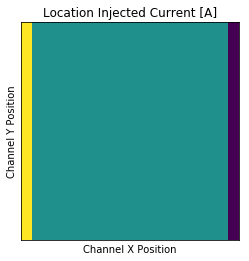

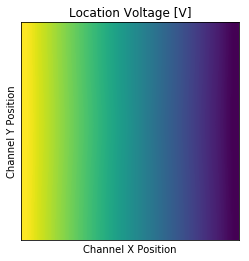

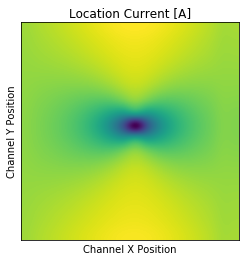

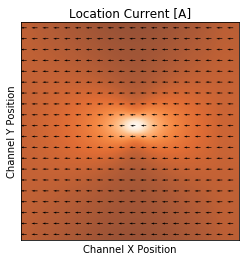

In [26]:
N = 20
Vt = 5

t_ox = 25
k_air = 1
k_ox = 3.9
epsilon_0 = 1

xs = np.linspace(0, 5e3, N)
ys = np.linspace(0, 5e3, N)

Xs, Ys = np.meshgrid(xs, ys)

VBG = 5
VTip = 1
VGs = np.ones((N, N))
A_BG = (xs[1] - xs[0])*(ys[1] - ys[0])
A_Tip = (xs[1] - xs[0])*(ys[1] - ys[0])
CBG = k_ox*epsilon_0*A_BG/t_ox
x_Tip = xs[len(xs)//2]
y_Tip = ys[len(ys)//2]
z_Tip = 200
d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip - 0)**2)
CTips = k_air*epsilon_0*A_Tip/d_Tips
VGs = (CTips*VTip + CBG*VBG)/(CTips + CBG)

Gs = stevenSimpleFET1(VGS=VGs, Vt=Vt)['Gds']

injectIs = np.zeros((N,N))
injectIs[:,0] = 1
injectIs[:,-1] = -1

gnet = getNetworkGandVs(Gs, injectIs=injectIs)

plt.imshow(CTips)
plt.title('Channel to Tip Capacitance')
plt.show()

plt.imshow(VGs)
plt.colorbar()
plt.title('Effective Gate Voltage')
plt.show()

plotGNetAnalysis(gnet)


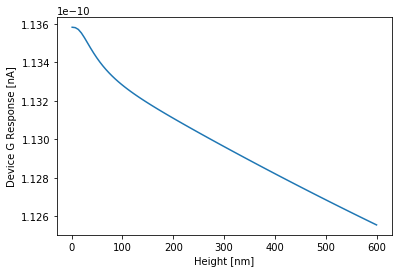

In [31]:
heights = np.linspace(1, 600, 100)
gnets = []

for z_Tip in heights:
    try:
        N = 20
        Vt = 5

        t_ox = 25
        k_air = 1
        k_ox = 3.9
        epsilon_0 = 1

        xs = np.linspace(0, 5e3, N)
        ys = np.linspace(0, 5e3, N)

        Xs, Ys = np.meshgrid(xs, ys)

        VBG = 3
        VTip = 6
        VGs = np.ones((N, N))
        A_BG = (xs[1] - xs[0])*(ys[1] - ys[0])
        A_Tip = (xs[1] - xs[0])*(ys[1] - ys[0])
        CBG = k_ox*epsilon_0*A_BG/t_ox
        x_Tip = xs[len(xs)//2]
        y_Tip = ys[len(ys)//2]
        # z_Tip = 200
        d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip - 0)**2)
        CTips = k_air*epsilon_0*A_Tip/d_Tips
        VGs = (CTips*VTip + CBG*VBG)/(CTips + CBG)

        Gs = stevenSimpleFET1(VGS=VGs, Vt=Vt)['Gds']

        injectIs = np.zeros((N,N))
        injectIs[:,0] = 1
        injectIs[:,-1] = -1

        gnet = getNetworkGandVs(Gs, injectIs=injectIs)
        gnets.append(gnet)
    except Exception as e:
        print(z_Tip)

responses = [g['G'] for g in gnets]

plt.plot(heights, responses)
plt.xlabel('Height [nm]')
plt.ylabel('Device G Response [nA]')
plt.show()

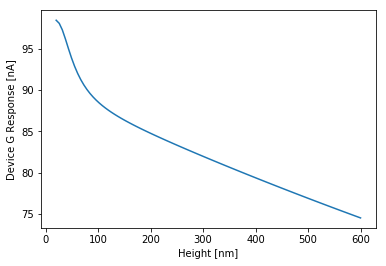

In [58]:
heights = np.linspace(20, 600, 100)
gnets = []

for z_Tip in heights:
    try:
        N = 20
        Vt = 5

        t_ox = 25
        k_air = 1
        k_ox = 3.9
        epsilon_0 = 1

        xs = np.linspace(0, 5e3, N)
        ys = np.linspace(0, 5e3, N)

        Xs, Ys = np.meshgrid(xs, ys)

        VBG = 6
        VTip = -3
        VGs = np.ones((N, N))
        A_BG = (xs[1] - xs[0])*(ys[1] - ys[0])
        A_Tip = (xs[1] - xs[0])*(ys[1] - ys[0])
        CBG = k_ox*epsilon_0*A_BG/t_ox
        x_Tip = xs[len(xs)//2]
        y_Tip = ys[len(ys)//2]
        # z_Tip = 200
        d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip - 0)**2)
        CTips = k_air*epsilon_0*A_Tip/d_Tips
        VGs = (CTips*VTip + CBG*VBG)/(CTips + CBG)

        Gs = stevenSimpleFET1(VGS=VGs, Vt=Vt)['Gds']

        injectIs = np.zeros((N,N))
        injectIs[:,0] = 1
        injectIs[:,-1] = -1

        gnet = getNetworkGandVs(Gs, injectIs=injectIs)
        gnets.append(gnet)
    except Exception as e:
        print(z_Tip)

responses = np.array([g['G'] for g in gnets])
Gs = stevenSimpleFET1(VGS=VBG*np.ones((N, N)), Vt=Vt)['Gds']
noTipResponse = getNetworkGandVs(Gs, injectIs=injectIs)['G']

plt.plot(heights, -1e9*(responses - noTipResponse))
plt.xlabel('Height [nm]')
plt.ylabel('Device G Response [nA]')
plt.show()

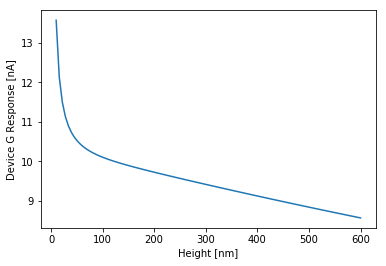

In [44]:
allHeights = np.linspace(10, 600, 100)
gnets = []
heights = []

for z_Tip in allHeights:
    try:
        N = 20
        Vt = -3
        VDS = 0.022
        
        t_ox = 25
        k_air = 1
        k_ox = 3.9
        epsilon_0 = 1
        
        xs = np.linspace(0, 5e3, N)
        ys = np.linspace(0, 5e3, N)
        
        Xs, Ys = np.meshgrid(xs, ys)
        
        VBG = 0
        VTip = -6
        VGs = np.ones((N, N))
        A_BG = (xs[1] - xs[0])*(ys[1] - ys[0])
        A_Tip = (xs[1] - xs[0])*(ys[1] - ys[0])*0.1
        CBG = k_ox*epsilon_0*A_BG/t_ox
        x_Tip = xs[len(xs)//2]
        y_Tip = ys[len(ys)//2]
        # z_Tip = 200
        d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip - 0)**2)
        CTips = k_air*epsilon_0*A_Tip/d_Tips
        VGs = (CTips*VTip + CBG*VBG)/(CTips + CBG)
        
        Gs = stevenSimpleFET1(VGS=VGs, Vt=Vt, VDS=VDS)['Gds']
        
        injectIs = np.zeros((N,N))
        injectIs[:,0] = 1
        injectIs[:,-1] = -1
        
        gnet = getNetworkGandVs(Gs, injectIs=injectIs)
        gnets.append(gnet)
        heights.append(z_Tip)
    except Exception as e:
        print(e)

responses = np.array([g['G'] for g in gnets])
Gs = stevenSimpleFET1(VGS=VBG*np.ones((N, N)), Vt=Vt, VDS=VDS)['Gds']
noTipResponse = getNetworkGandVs(Gs, injectIs=injectIs)['G']

plt.plot(heights, -1e9*(responses - noTipResponse))
plt.xlabel('Height [nm]')
plt.ylabel('Device G Response [nA]')
plt.show()

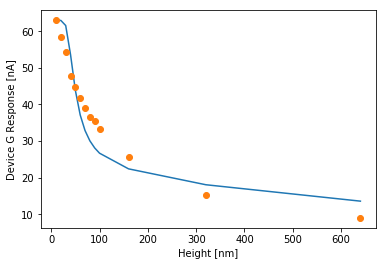

In [79]:
heights = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 160, 320, 640]
signals = [63.04124999999997, 58.582499999999975, 54.282500000000034, 47.86500000000001, 44.899999999999984, 41.78250000000005, 39.08249999999997, 36.599999999999994, 35.50000000000002, 33.26499999999996, 25.600000000000016, 15.291249999999984, 8.982499999999952]

def simulateHeightResponses():
    gnets = []

    for z_Tip in heights:
        try:
            N = 20
            Vt = -3
            VDS = 0.022

            t_ox = 25
            k_air = 1
            k_ox = 3.9
            epsilon_0 = 1

            xs = np.linspace(0, 5e3, N)
            ys = np.linspace(0, 5e3, N)

            Xs, Ys = np.meshgrid(xs, ys)

            VBG = 0
            VTip = -6
            VGs = np.ones((N, N))
            A_BG = (xs[1] - xs[0])*(ys[1] - ys[0])
            A_Tip = (xs[1] - xs[0])*(ys[1] - ys[0])*100
            CBG = k_ox*epsilon_0*A_BG/t_ox
            x_Tip = xs[len(xs)//2]
            y_Tip = ys[len(ys)//2]
            # z_Tip = 200
            d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip - 0)**2)
            CTips = k_air*epsilon_0*A_Tip/d_Tips**1.8
            VGs = (CTips*VTip + CBG*VBG)/(CTips + CBG)

            Gs = stevenSimpleFET1(VGS=VGs, Vt=Vt, VDS=VDS)['Gds']

            injectIs = np.zeros((N,N))
            injectIs[:,0] = 1
            injectIs[:,-1] = -1

            gnet = getNetworkGandVs(Gs, injectIs=injectIs)
            gnets.append(gnet)
        except Exception as e:
            print(e)

    responses = np.array([g['G'] for g in gnets])
    Gs = stevenSimpleFET1(VGS=VBG*np.ones((N, N)), Vt=Vt, VDS=VDS)['Gds']
    noTipResponse = getNetworkGandVs(Gs, injectIs=injectIs)['G']
    
    result = -1e9*(responses - noTipResponse)
    result /= np.max(result)
    result *= np.max(signals)
    
    return result

plt.plot(heights, simulateHeightResponses())
plt.plot(heights, signals, 'o')
plt.xlabel('Height [nm]')
plt.ylabel('Device G Response [nA]')
plt.show()

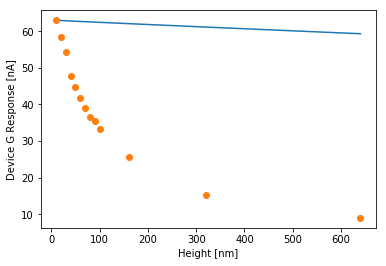

In [147]:
heights = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 160, 320, 640]
signals = [63.04124999999997, 58.582499999999975, 54.282500000000034, 47.86500000000001, 44.899999999999984, 41.78250000000005, 39.08249999999997, 36.599999999999994, 35.50000000000002, 33.26499999999996, 25.600000000000016, 15.291249999999984, 8.982499999999952]

def simulateHeightResponses():
    gnets = []
    
    for z_Tip in heights:
        try:
            N = 20
            Vt = -5
            VDS = 0.022
            
            t_ox = 25
            k_air = 1
            k_ox = 3.9
            epsilon_0 = 1
            
            xs = np.linspace(0, 5e3, N)
            ys = np.linspace(0, 5e3, N)
            
            dx = np.abs(xs[1] - xs[0])
            dy = np.abs(ys[1] - ys[0])
            
            Xs, Ys = np.meshgrid(xs, ys)
            
            VBG = 0
            VTip = -6
            VGs = np.ones((N, N))
            A_BG = dx*dy
            A_Tip = dx*dy
            CBG = k_ox*epsilon_0*A_BG/t_ox
            x_Tip = xs[len(xs)//2]
            y_Tip = ys[len(ys)//2]
            # z_Tip = 200
            
            TipTheta = np.deg2rad(20)
            
            CTipss = []
            
            A_Tip = np.pi*(0.5*dx)**2
            d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip - 0)**2)
            CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
            
            for rt in range(1,9):
                ht = dx/np.tan(TipTheta)
                A_Tip = 2*np.pi*(rt*dx)*ht/8
                d_Tips = np.sqrt((x_Tip+rt*dx - Xs)**2 + (y_Tip+rt*dy - Ys)**2 + (z_Tip+rt*ht - 0)**2)
                CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
                d_Tips = np.sqrt((x_Tip-rt*dx - Xs)**2 + (y_Tip+rt*dy - Ys)**2 + (z_Tip+rt*ht - 0)**2)
                CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
                d_Tips = np.sqrt((x_Tip+rt*dx - Xs)**2 + (y_Tip-rt*dy - Ys)**2 + (z_Tip+rt*ht - 0)**2)
                CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
                d_Tips = np.sqrt((x_Tip-rt*dx - Xs)**2 + (y_Tip-rt*dy - Ys)**2 + (z_Tip+rt*ht - 0)**2)
                CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
                d_Tips = np.sqrt((x_Tip+rt*dx - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip+rt*ht - 0)**2)
                CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
                d_Tips = np.sqrt((x_Tip-rt*dx - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip+rt*ht - 0)**2)
                CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
                d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip+rt*dy - Ys)**2 + (z_Tip+rt*ht - 0)**2)
                CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
                d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip-rt*dy - Ys)**2 + (z_Tip+rt*ht - 0)**2)
                CTipss.append(k_air*epsilon_0*A_Tip/d_Tips)
            
            CTips = np.sum(CTipss, axis=0)
            
            VGs = (CTips*VTip + CBG*VBG)/(CTips + CBG)
            
            Gs = stevenSimpleFET1(VGS=VGs, Vt=Vt, VDS=VDS)['Gds']
            
            injectIs = np.zeros((N,N))
            injectIs[:,0] = 1
            injectIs[:,-1] = -1
            
            gnet = getNetworkGandVs(Gs, injectIs=injectIs)
            gnets.append(gnet)
        except Exception as e:
            print(e)
    
    responses = np.array([g['G'] for g in gnets])
    Gs = stevenSimpleFET1(VGS=VBG*np.ones((N, N)), Vt=Vt, VDS=VDS)['Gds']
    noTipResponse = getNetworkGandVs(Gs, injectIs=injectIs)['G']
    
    result = -1e9*(responses - noTipResponse)
    result /= np.max(result)
    result *= np.max(signals)
    
    return result

plt.plot(heights, simulateHeightResponses())
plt.plot(heights, signals, 'o')
plt.xlabel('Height [nm]')
plt.ylabel('Device G Response [nA]')
plt.show()


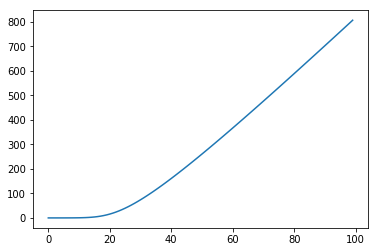

In [21]:
plt.plot(stevenSimpleFET1(VGS=np.linspace(-7,4,100), Vt=Vt, VDS=VDS)['Id']*1e9)
plt.show()

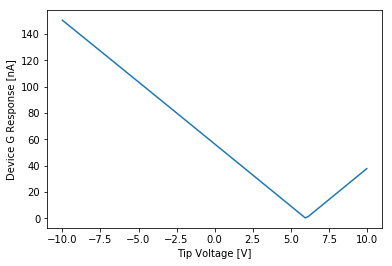

In [59]:
tipVoltages = np.linspace(-10, 10, 100)
gnets = []

for VTip in tipVoltages:
    try:
        N = 20
        Vt = 5

        t_ox = 25
        k_air = 1
        k_ox = 3.9
        epsilon_0 = 1

        xs = np.linspace(0, 5e3, N)
        ys = np.linspace(0, 5e3, N)

        Xs, Ys = np.meshgrid(xs, ys)

        VBG = 6
#         VTip = -3
        VGs = np.ones((N, N))
        A_BG = (xs[1] - xs[0])*(ys[1] - ys[0])
        A_Tip = (xs[1] - xs[0])*(ys[1] - ys[0])
        CBG = k_ox*epsilon_0*A_BG/t_ox
        x_Tip = xs[len(xs)//2]
        y_Tip = ys[len(ys)//2]
        z_Tip = 200
        d_Tips = np.sqrt((x_Tip - Xs)**2 + (y_Tip - Ys)**2 + (z_Tip - 0)**2)
        CTips = k_air*epsilon_0*A_Tip/d_Tips
        VGs = (CTips*VTip + CBG*VBG)/(CTips + CBG)

        Gs = stevenSimpleFET1(VGS=VGs, Vt=Vt)['Gds']

        injectIs = np.zeros((N,N))
        injectIs[:,0] = 1
        injectIs[:,-1] = -1

        gnet = getNetworkGandVs(Gs, injectIs=injectIs)
        gnets.append(gnet)
    except Exception as e:
        print(z_Tip)

responses = np.array([g['G'] for g in gnets])
Gs = stevenSimpleFET1(VGS=VBG*np.ones((N, N)), Vt=Vt)['Gds']
noTipResponse = getNetworkGandVs(Gs, injectIs=injectIs)['G']

plt.plot(tipVoltages, np.abs(-1e9*(responses - noTipResponse)))
plt.xlabel('Tip Voltage [V]')
plt.ylabel('Device G Response [nA]')
plt.show()